In [4]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
import pandas_profiling

import missingno as msno
warnings.filterwarnings('ignore')

In [385]:
df = pd.read_csv('merged_df.csv')

In [386]:
df.head(2)

incident_number  offense_code offense_code_group  \
0      I192068249          2647              Other   
1      I192061894          1106   Confidence Games   

               offense_description district reporting_area shooting  \
0        THREATS TO DO BODILY HARM       B2            280      NaN   
1  FRAUD - CREDIT CARD / ATM FRAUD      C11            356      NaN   

      occurred_on_date  year  month day_of_week  hour  ucr_part  \
0  2015-08-28 10:20:00  2015      8      Friday    10  Part Two   
1  2015-08-20 00:00:00  2015      8    Thursday     0  Part Two   

          street        lat       long                     location  
0  WASHINGTON ST  42.330119 -71.084251  (42.33011862, -71.08425106)  
1     CHARLES ST  42.300605 -71.061268  (42.30060543, -71.06126785)

In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631670 entries, 0 to 631669
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   incident_number      631670 non-null  object 
 1   offense_code         631670 non-null  int64  
 2   offense_code_group   353253 non-null  object 
 3   offense_description  631670 non-null  object 
 4   district             627415 non-null  object 
 5   reporting_area       631670 non-null  object 
 6   shooting             279872 non-null  object 
 7   occurred_on_date     631670 non-null  object 
 8   year                 631670 non-null  int64  
 9   month                631670 non-null  int64  
 10  day_of_week          631670 non-null  object 
 11  hour                 631670 non-null  int64  
 12  ucr_part             353156 non-null  object 
 13  street               619782 non-null  object 
 14  lat                  609140 non-null  float64
 15  long             

In [388]:
df.describe(include = 'all').T

count  unique                              top  \
incident_number        631670  589597                       I152071596   
offense_code         631670.0     NaN                              NaN   
offense_code_group     353253      67  Motor Vehicle Accident Response   
offense_description    631670     305               INVESTIGATE PERSON   
district               627415      13                               B2   
reporting_area         631670     881                                    
shooting             279872.0     5.0                              0.0   
occurred_on_date       631670  483563              2017-06-01 00:00:00   
year                 631670.0     NaN                              NaN   
month                631670.0     NaN                              NaN   
day_of_week            631670       7                           Friday   
hour                 631670.0     NaN                              NaN   
ucr_part               353156       4                       Part Three   
street                 619782   16090                    WASHINGTON ST   
lat                  609140.0     NaN                              NaN   
long                 609140.0     NaN                              NaN   
location               631670   46723                           (0, 0)   

                         freq         mean          std     min        25%  \
incident_number            20          NaN          NaN     NaN        NaN   
offense_code              NaN  2336.364026  1195.149081   100.0     1102.0   
offense_code_group      41064          NaN          NaN     NaN        NaN   
offense_description     43324          NaN          NaN     NaN        NaN   
district                96177          NaN          NaN     NaN        NaN   
reporting_area          87425          NaN          NaN     NaN        NaN   
shooting             267943.0          NaN          NaN     NaN        NaN   
occurred_on_date           33          NaN          NaN     NaN        NaN   
year                      NaN  2018.281188     2.077247  2015.0     2017.0   
month                     NaN     6.645813     3.330089     1.0        4.0   
day_of_week             96234          NaN          NaN     NaN        NaN   
hour                      NaN    12.998015     6.352361     0.0        9.0   
ucr_part               176042          NaN          NaN     NaN        NaN   
street                  32259          NaN          NaN     NaN        NaN   
lat                       NaN    41.534277     5.743404   -90.0  42.295923   
long                      NaN   -69.767366       9.5781   -90.0 -71.097223   
location                73188          NaN          NaN     NaN        NaN   

                           50%        75%       max  
incident_number            NaN        NaN       NaN  
offense_code            3005.0     3201.0   99999.0  
offense_code_group         NaN        NaN       NaN  
offense_description        NaN        NaN       NaN  
district                   NaN        NaN       NaN  
reporting_area             NaN        NaN       NaN  
shooting                   NaN        NaN       NaN  
occurred_on_date           NaN        NaN       NaN  
year                    2018.0     2020.0    2022.0  
month                      7.0        9.0      12.0  
day_of_week                NaN        NaN       NaN  
hour                      14.0       18.0      23.0  
ucr_part                   NaN        NaN       NaN  
street                     NaN        NaN       NaN  
lat                  42.325253  42.348406  42.46141  
long                 -71.07693  -71.06134       0.0  
location                   NaN        NaN       NaN

In [389]:
df.isnull().sum()

incident_number             0
offense_code                0
offense_code_group     278417
offense_description         0
district                 4255
reporting_area              0
shooting               351798
occurred_on_date            0
year                        0
month                       0
day_of_week                 0
hour                        0
ucr_part               278514
street                  11888
lat                     22530
long                    22530
location                    0
dtype: int64

In [390]:
df.duplicated().sum()

643

In [391]:
"""data_profile = pandas_profiling.ProfileReport(df)
data_profile.to_file(output_file = 'Data_Profile.html')"""

"data_profile = pandas_profiling.ProfileReport(df)\ndata_profile.to_file(output_file = 'Data_Profile.html')"

In [394]:
df.groupby('offense_code')['offense_code_group'].get_group(3831).str.replace('m/v - leaving scene - property damage', 'motor vehicle accident response')

150       Motor Vehicle Accident Response
341       Motor Vehicle Accident Response
382       Motor Vehicle Accident Response
451       Motor Vehicle Accident Response
488       Motor Vehicle Accident Response
                       ...               
631597                                NaN
631605                                NaN
631635                                NaN
631652                                NaN
631665                                NaN
Name: offense_code_group, Length: 34168, dtype: object

In [395]:
df.offense_description.isnull().sum()

0

In [396]:
df.ucr_part.unique()

array(['Part Two', 'Part Three', 'Part One', 'Other', nan], dtype=object)

In [397]:
df.groupby('ucr_part').get_group('Part Three')

incident_number  offense_code        offense_code_group  \
9           I182061268          3201             Property Lost   
11          I182054888          3170                     Other   
19          I182016943          3201             Property Lost   
30          I172094797          3115        Investigate Person   
35          I172077677          3110  Police Service Incidents   
...                ...           ...                       ...   
353244   I070720870-00          3125           Warrant Arrests   
353245   I070720870-00          3125           Warrant Arrests   
353246   I070720870-00          3125           Warrant Arrests   
353249   I070720870-00          3125           Warrant Arrests   
353252   I060168073-00          3125           Warrant Arrests   

                       offense_description district reporting_area shooting  \
9                          PROPERTY - LOST      NaN                     NaN   
11                    INTIMIDATING WITNESS       B2            326      NaN   
19                         PROPERTY - LOST      C11            366      NaN   
30                      INVESTIGATE PERSON      D14            775      NaN   
35      SERVICE TO OTHER PD OUTSIDE OF MA.       E5            552      NaN   
...                                    ...      ...            ...      ...   
353244                      WARRANT ARREST       B2            318      NaN   
353245                      WARRANT ARREST       B2            318      NaN   
353246                      WARRANT ARREST       B2            318      NaN   
353249                      WARRANT ARREST       B2            318      NaN   
353252                      WARRANT ARREST      E13            912      NaN   

           occurred_on_date  year  month day_of_week  hour    ucr_part  \
9       2015-06-15 00:00:00  2015      6      Monday     0  Part Three   
11      2015-07-12 15:37:00  2015      7      Sunday    15  Part Three   
19      2015-08-20 08:00:00  2015      8    Thursday     8  Part Three   
30      2015-07-01 00:01:00  2015      7   Wednesday     0  Part Three   
35      2015-09-01 12:00:00  2015      9     Tuesday    12  Part Three   
...                     ...   ...    ...         ...   ...         ...   
353244  2018-12-13 00:00:00  2018     12    Thursday     0  Part Three   
353245  2018-12-13 00:00:00  2018     12    Thursday     0  Part Three   
353246  2018-12-13 00:00:00  2018     12    Thursday     0  Part Three   
353249  2018-12-13 00:00:00  2018     12    Thursday     0  Part Three   
353252  2018-01-27 14:01:00  2018      1    Saturday    14  Part Three   

                street        lat       long                     location  
9              BERNARD  -1.000000  -1.000000   (-1.00000000, -1.00000000)  
11          FAYSTON ST  42.312243 -71.075499  (42.31224327, -71.07549901)  
19            EDWIN ST  42.289433 -71.060522  (42.28943324, -71.06052190)  
30      WALLINGFORD RD  42.341349 -71.151228  (42.34134946, -71.15122795)  
35          DENTON TER  42.280230 -71.133143  (42.28023006, -71.13314261)  
...                ...        ...        ...                          ...  
353244   BROOKLEDGE ST  42.309563 -71.089902  (42.30956305, -71.08990197)  
353245   BROOKLEDGE ST  42.309563 -71.089902  (42.30956305, -71.08990197)  
353246   BROOKLEDGE ST  42.309563 -71.089902  (42.30956305, -71.08990197)  
353249   BROOKLEDGE ST  42.309563 -71.089902  (42.30956305, -71.08990197)  
353252       CENTRE ST  42.322838 -71.100967  (42.32283759, -71.10096723)  

[176042 rows x 17 columns]

In [398]:
df.groupby('ucr_part').get_group('Part Two')

incident_number  offense_code offense_code_group  \
0           I192068249          2647              Other   
1           I192061894          1106   Confidence Games   
2           I192038828          1107              Fraud   
3           I192008877          1107              Fraud   
4           I182090828          1102              Fraud   
...                ...           ...                ...   
353236   I140212767-00          1848     Drug Violation   
353247   I070720870-00           802     Simple Assault   
353248   I070720870-00           802     Simple Assault   
353250   I060168073-00          1864     Drug Violation   
353251   I060168073-00          1864     Drug Violation   

                                   offense_description district  \
0                            THREATS TO DO BODILY HARM       B2   
1                      FRAUD - CREDIT CARD / ATM FRAUD      C11   
2                                FRAUD - IMPERSONATION       A1   
3                                FRAUD - IMPERSONATION      E18   
4                      FRAUD - FALSE PRETENSE / SCHEME       D4   
...                                                ...      ...   
353236  DRUGS - POSS CLASS B - INTENT TO MFR DIST DISP      E13   
353247                               ASSAULT & BATTERY       B2   
353248                               ASSAULT & BATTERY       B2   
353250     DRUGS - POSS CLASS D - INTENT MFR DIST DISP      E13   
353251     DRUGS - POSS CLASS D - INTENT MFR DIST DISP      E13   

       reporting_area shooting     occurred_on_date  year  month day_of_week  \
0                 280      NaN  2015-08-28 10:20:00  2015      8      Friday   
1                 356      NaN  2015-08-20 00:00:00  2015      8    Thursday   
2                 172      NaN  2015-11-02 12:24:00  2015     11      Monday   
3                 525      NaN  2015-07-31 10:00:00  2015      7      Friday   
4                 159      NaN  2015-12-01 12:00:00  2015     12     Tuesday   
...               ...      ...                  ...   ...    ...         ...   
353236            303      NaN  2018-09-17 18:54:00  2018      9      Monday   
353247            318      NaN  2018-12-13 00:00:00  2018     12    Thursday   
353248            318      NaN  2018-12-13 00:00:00  2018     12    Thursday   
353250            912      NaN  2018-01-27 14:01:00  2018      1    Saturday   
353251            912      NaN  2018-01-27 14:01:00  2018      1    Saturday   

        hour  ucr_part         street        lat       long  \
0         10  Part Two  WASHINGTON ST  42.330119 -71.084251   
1          0  Part Two     CHARLES ST  42.300605 -71.061268   
2         12  Part Two      ALBANY ST  42.334288 -71.072395   
3         10  Part Two     WINGATE RD  42.237009 -71.129566   
4         12  Part Two       UPTON ST  42.342432 -71.072258   
...      ...       ...            ...        ...        ...   
353236    18  Part Two       AMORY ST  42.320272 -71.099325   
353247     0  Part Two  BROOKLEDGE ST  42.309563 -71.089902   
353248     0  Part Two  BROOKLEDGE ST  42.309563 -71.089902   
353250    14  Part Two      CENTRE ST  42.322838 -71.100967   
353251    14  Part Two      CENTRE ST  42.322838 -71.100967   

                           location  
0       (42.33011862, -71.08425106)  
1       (42.30060543, -71.06126785)  
2       (42.33428841, -71.07239518)  
3       (42.23700950, -71.12956606)  
4       (42.34243222, -71.07225766)  
...                             ...  
353236  (42.32027226, -71.09932525)  
353247  (42.30956305, -71.08990197)  
353248  (42.30956305, -71.08990197)  
353250  (42.32283759, -71.10096723)  
353251  (42.32283759, -71.10096723)  

[107656 rows x 17 columns]

### Handling null values 

In [399]:
df.isnull().sum()

incident_number             0
offense_code                0
offense_code_group     278417
offense_description         0
district                 4255
reporting_area              0
shooting               351798
occurred_on_date            0
year                        0
month                       0
day_of_week                 0
hour                        0
ucr_part               278514
street                  11888
lat                     22530
long                    22530
location                    0
dtype: int64

<AxesSubplot:>

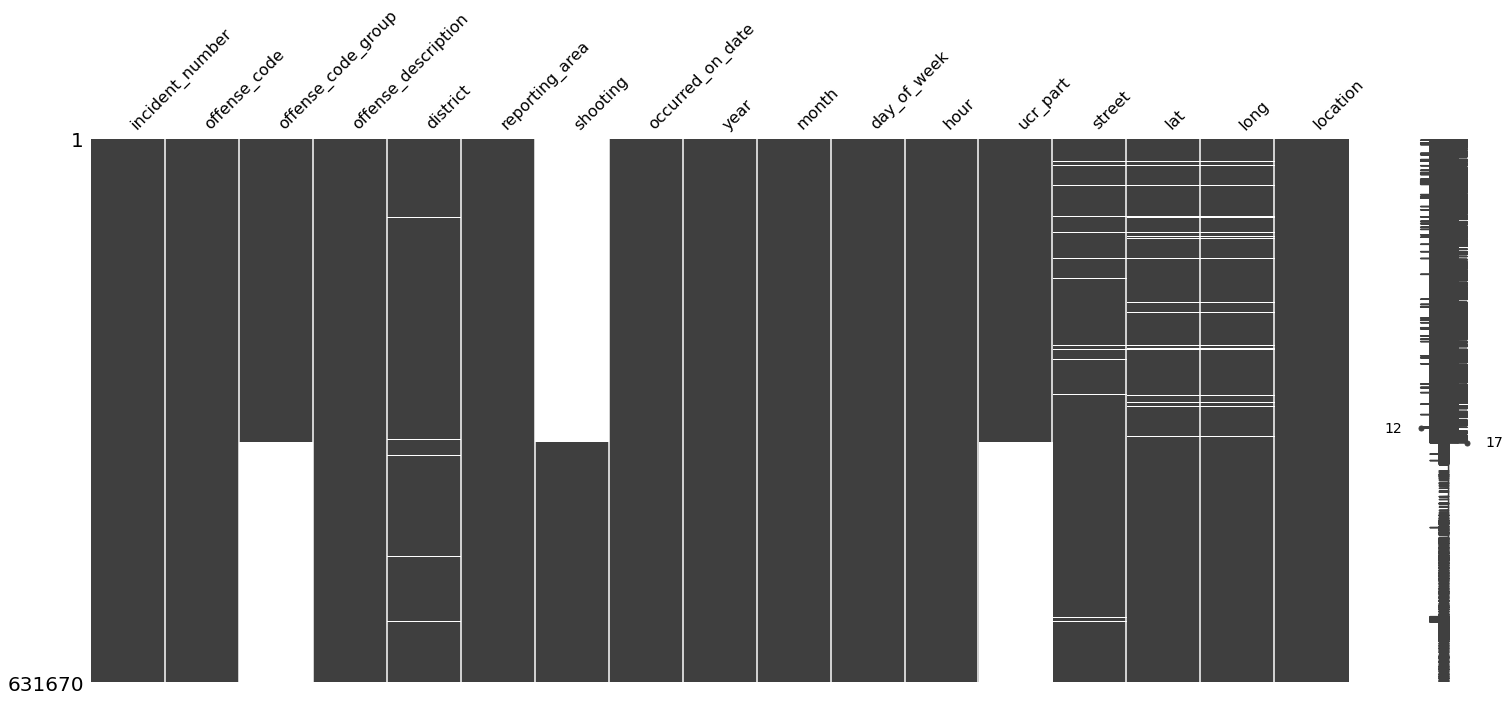

In [400]:
msno.matrix(df)

In [401]:
df.offense_code_group.fillna(df.offense_description, inplace = True)

<AxesSubplot:>

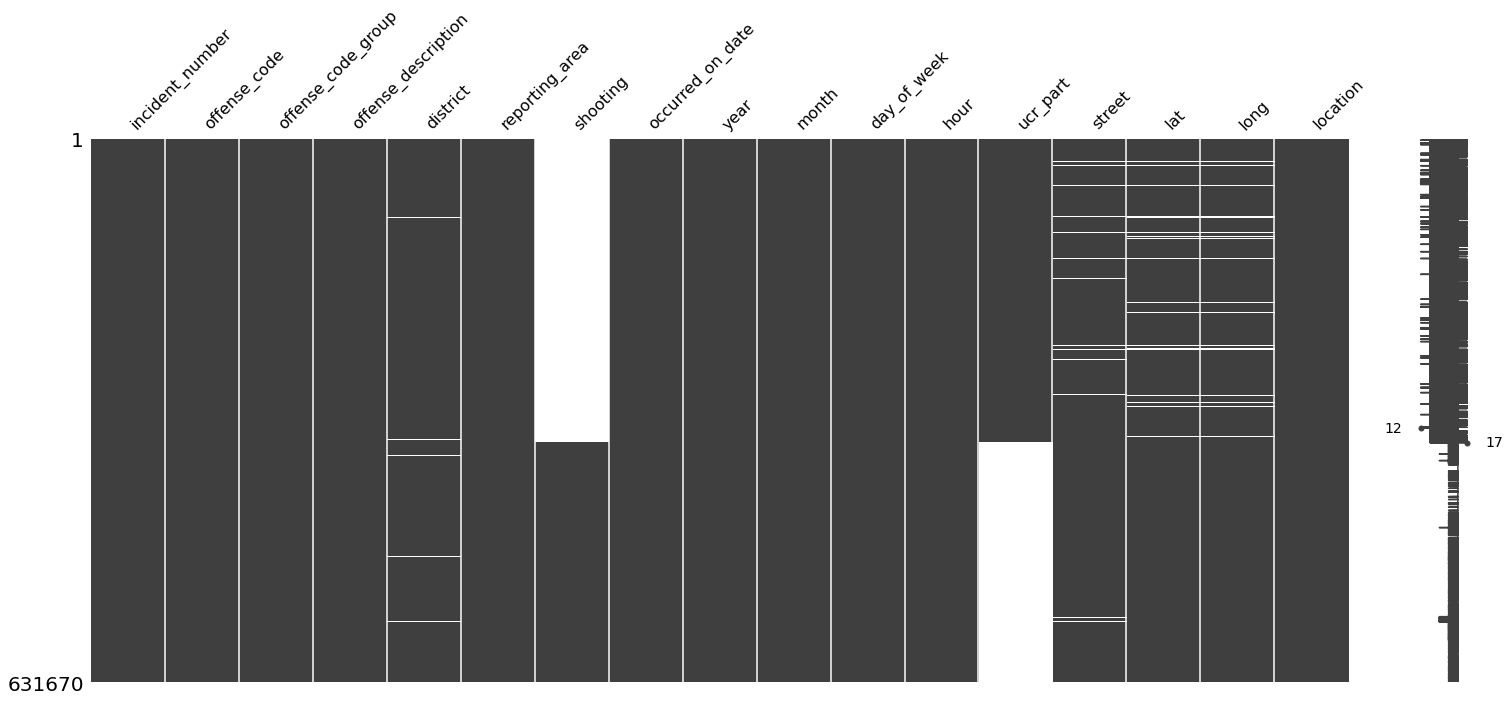

In [402]:
msno.matrix(df)

In [403]:
df['offense_description'] = df.offense_description.str.lower()
df['offense_code_group'] = df.offense_code_group.str.lower()
df['street'] = df.street.str.lower()

In [404]:
df

incident_number  offense_code  \
0           I192068249          2647   
1           I192061894          1106   
2           I192038828          1107   
3           I192008877          1107   
4           I182090828          1102   
...                ...           ...   
631665       122207734          3831   
631666       122201046          2101   
631667       122056850          3801   
631668       122004001          3115   
631669        22031068          3114   

                                 offense_code_group  \
0                                             other   
1                                  confidence games   
2                                             fraud   
3                                             fraud   
4                                             fraud   
...                                             ...   
631665        m/v - leaving scene - property damage   
631666  operating under the influence (oui) alcohol   
631667                         m/v accident - other   
631668                           investigate person   
631669                         investigate property   

                                offense_description district reporting_area  \
0                         threats to do bodily harm       B2            280   
1                   fraud - credit card / atm fraud      C11            356   
2                             fraud - impersonation       A1            172   
3                             fraud - impersonation      E18            525   
4                   fraud - false pretense / scheme       D4            159   
...                                             ...      ...            ...   
631665        m/v - leaving scene - property damage       B3            465   
631666  operating under the influence (oui) alcohol       B2                  
631667                         m/v accident - other       D4            271   
631668                           investigate person      E13            912   
631669                         investigate property      C11            249   

       shooting     occurred_on_date  year  month day_of_week  hour  ucr_part  \
0           NaN  2015-08-28 10:20:00  2015      8      Friday    10  Part Two   
1           NaN  2015-08-20 00:00:00  2015      8    Thursday     0  Part Two   
2           NaN  2015-11-02 12:24:00  2015     11      Monday    12  Part Two   
3           NaN  2015-07-31 10:00:00  2015      7      Friday    10  Part Two   
4           NaN  2015-12-01 12:00:00  2015     12     Tuesday    12  Part Two   
...         ...                  ...   ...    ...         ...   ...       ...   
631665        0  2022-02-01 18:00:00  2022      2     Tuesday    18       NaN   
631666        0  2022-02-12 21:54:00  2022      2    Saturday    21       NaN   
631667        0  2022-07-28 19:40:00  2022      7    Thursday    19       NaN   
631668        0  2022-01-19 09:30:00  2022      1   Wednesday     9       NaN   
631669        0  2022-05-02 08:00:00  2022      5      Monday     8       NaN   

                                                   street        lat  \
0                                           washington st  42.330119   
1                                              charles st  42.300605   
2                                               albany st  42.334288   
3                                              wingate rd  42.237009   
4                                                upton st  42.342432   
...                                                   ...        ...   
631665                                   blue hill avenue   0.000000   
631666                                   blue hill avenue   0.000000   
631667  massachusetts ave & harrison ave\nboston  ma 0...  42.334910   
631668                                           heath st  42.325131   
631669                                          saxton st  42.313591   

             long                                  location  
0      -71.08425

In [405]:
df['ucr_part'][631667] = "Part Three"

In [406]:
df['ucr_part'][631667]

'Part Three'

In [407]:
df.street.unique()

array(['washington st', 'charles st', 'albany st', ...,
       'e cottage st & columbia rd\nboston  ma 02125\nunited',
       'morton st & wellington hill st\nboston  ma 02126\nun',
       'sumner st & lisbon st\neast boston  ma 02128\nunited'],
      dtype=object)

In [392]:
df.shooting.unique()

array([nan, 'Y', '0', '1', 0, 1], dtype=object)

In [408]:
df.shooting.fillna(0, inplace = True)

In [444]:
for i in df.groupby('shooting').get_group('Y').index:
    df['shooting'][i] = 1

In [446]:
df['shooting'] = df['shooting'].astype('int')

<AxesSubplot:>

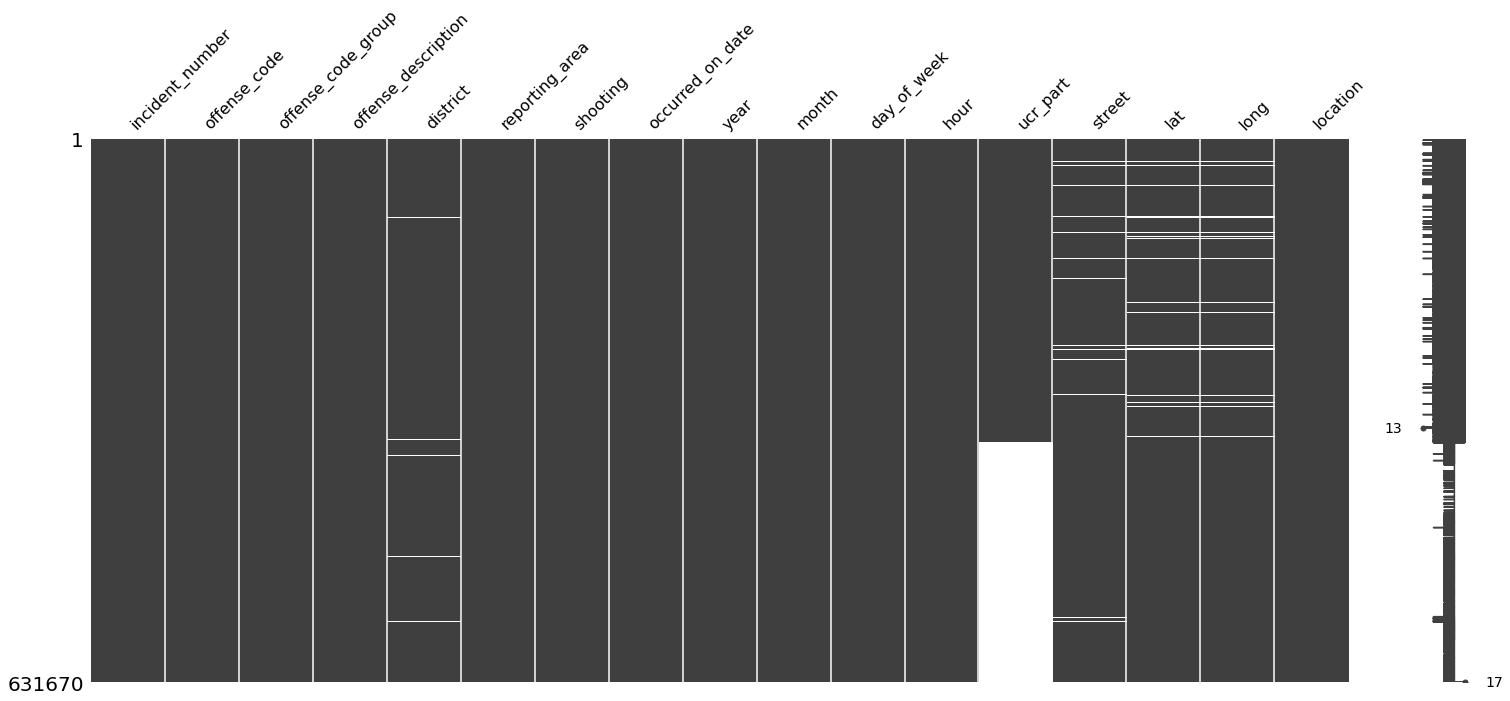

In [409]:
msno.matrix(df)

In [410]:
df.groupby('ucr_part')['offense_code_group'].get_group('Part One').unique()

array(['larceny', 'larceny from motor vehicle', 'auto theft', 'robbery',
       'residential burglary', 'aggravated assault',
       'commercial burglary', 'other burglary', 'homicide'], dtype=object)

In [411]:
df.groupby('ucr_part')['offense_code_group'].get_group('Part Two').unique()

array(['other', 'confidence games', 'fraud', 'harassment',
       'criminal harassment', 'restraining order violations',
       'firearm violations', 'simple assault', 'embezzlement',
       'counterfeiting', 'prisoner related incidents', 'vandalism',
       'offenses against child / family', 'violations', 'evading fare',
       'drug violation', 'disorderly conduct',
       'operating under the influence', 'ballistics',
       'recovered stolen property', 'liquor violation', 'bomb hoax',
       'fire related reports', 'gambling', 'prostitution',
       'phone call complaints', 'missing person reported', 'explosives',
       'biological threat'], dtype=object)

In [412]:
df.groupby('ucr_part')['offense_code_group'].get_group('Part Three').unique()

array(['property lost', 'other', 'investigate person',
       'police service incidents', 'warrant arrests', 'property found',
       'medical assistance', 'missing person located',
       'missing person reported', 'motor vehicle accident response',
       'investigate property', 'license plate related incidents',
       'firearm discovery', 'verbal disputes', 'search warrants',
       'landlord/tenant disputes', 'towed', 'license violation',
       'fire related reports', 'property related damage',
       'assembly or gathering violations', 'aircraft', 'service',
       'explosives', 'prisoner related incidents',
       'harbor related incidents', 'm/v accident - other'], dtype=object)

In [413]:
df.groupby('ucr_part')['offense_code'].get_group('Part One').unique()

array([619, 615, 724, 617, 361, 614, 613, 616, 520, 727, 413, 706, 522,
       540, 301, 562, 521, 423, 612, 560, 611, 111, 311, 542, 371, 351,
       381, 561, 541, 618, 624, 633, 349, 432, 315, 334, 637, 639, 403,
       511, 623, 530, 339, 404, 770, 627, 629, 634, 402, 714, 338, 335],
      dtype=int64)

In [414]:
df.groupby('ucr_part')['offense_code'].get_group('Part Two').unique()

array([2647, 1106, 1107, 1102, 2629, 2670, 1109, 2007, 1108, 1501,  802,
       1201, 1001, 2619, 1402, 2610,  801, 2005, 2623, 2660, 2914, 2632,
       2905, 1874, 1849, 2900, 1810, 1841, 1843, 1848, 1503, 2405, 1830,
       2604, 1504, 2403, 2907, 2906, 2407, 1415, 1825, 1847, 1832, 1842,
       2006, 2101, 2662, 1845, 1304, 1815, 1300, 1806, 1831, 2204, 2616,
       1510, 1846, 2511, 1805, 2646, 2648, 1844, 2613,  804, 2641, 2401,
       2608, 1870, 2612, 2003, 2663, 2657, 1901, 1601, 1850, 2004, 2102,
       1602, 2628, 1502, 2617, 2622, 2636, 2605, 1605, 2642, 2664, 2611,
       2618, 1603, 1863, 1002,  803, 2910, 1105, 1866, 2609, 1807, 1302,
       2672, 2606, 1864], dtype=int64)

In [415]:
df.groupby('ucr_part')['offense_code'].get_group('Part Three').unique()

array([3201, 3170, 3115, 3110, 3125, 3207, 3109, 3018, 3502, 3501, 3208,
       3831, 3114, 3205, 3805, 3119, 3301, 3130, 3112, 3620, 3802, 3820,
       3810, 3410, 3111, 3803, 3006, 3801, 3001, 3160, 3007, 3830, 3002,
       3807, 3403, 3008, 3811, 3106, 3305, 3821, 3503, 3108, 3304, 3122,
       3625, 3202, 3402, 3302, 3016, 3102, 3004, 3123, 3303, 3203, 3029,
       3116], dtype=int64)

In [416]:
df.groupby('ucr_part')['offense_code'].get_group('Other').unique()

array([ 735,  670,  900, 2631,  547,  121,  123,  112,  527], dtype=int64)

In [417]:
#df.groupby('ucr_part')['offense_code'].get_group('Part Two').unique() in df.groupby('ucr_part')['offense_code'].get_group('Part One').unique() in df.groupby('ucr_part')['offense_code'].get_group('Part Three').unique() in df.groupby('ucr_part')['offense_code'].get_group('Part One').unique() in df.groupby('ucr_part')['offense_code'].get_group('Other').unique()

False

In [418]:
p1 = list(df.groupby('ucr_part')['offense_code'].get_group('Part One').unique())
p2 = list(df.groupby('ucr_part')['offense_code'].get_group('Part Two').unique())
p3 = list(df.groupby('ucr_part')['offense_code'].get_group('Part Three').unique())
p4 = list(df.groupby('ucr_part')['offense_code'].get_group('Other').unique())


In [419]:
print((min(p1), max(p1)))
print((min(p2), max(p2)))
print((min(p3), max(p3)))
print((min(p4), max(p4)))

(111, 770)
(801, 2914)
(3001, 3831)
(112, 2631)


In [420]:
for i in df.index:
    if df['offense_code'][i] in p1 and type(df['ucr_part'][i]) == float:
        df['ucr_part'][i] = 'Part One'
        print("part a in {}".format(i))
    elif df['offense_code'][i] in p2 and type(df['ucr_part'][i]) == float:
        df['ucr_part'][i] = 'Part Two'
        print("part b in {}".format(i))
    elif df['offense_code'][i] in p3 and type(df['ucr_part'][i]) == float:
        df['ucr_part'][i] = 'Part Three'
        print("part c in {}".format(i))
    elif df['offense_code'][i] in p4 and type(df['ucr_part'][i]) == float:
        df['ucr_part'][i] = 'Other'
        print("part Other in {}".format(i))

part c in 53315
part c in 53317
part c in 152992
part c in 153009
part c in 169978
part b in 353253
part c in 353254
part b in 353255
part c in 353256
part c in 353257
part b in 353258
part c in 353259
part c in 353260
part b in 353262
part c in 353263
part c in 353264
part c in 353265
part c in 353266
part c in 353267
part c in 353268
part b in 353269
part b in 353270
part b in 353271
part a in 353272
part c in 353273
part c in 353274
part b in 353275
part c in 353276
part b in 353277
part b in 353278
part b in 353279
part b in 353280
part b in 353281
part b in 353282
part a in 353283
part c in 353284
part b in 353285
part b in 353286
part c in 353287
part b in 353288
part a in 353289
part c in 353290
part c in 353291
part c in 353292
part b in 353293
part c in 353294
part c in 353295
part a in 353296
part c in 353297
part b in 353298
part c in 353299
part c in 353306
part b in 353309
part b in 353311
part c in 353314
part c in 353334
part b in 353346
part b in 353348
part b in 353354

<AxesSubplot:>

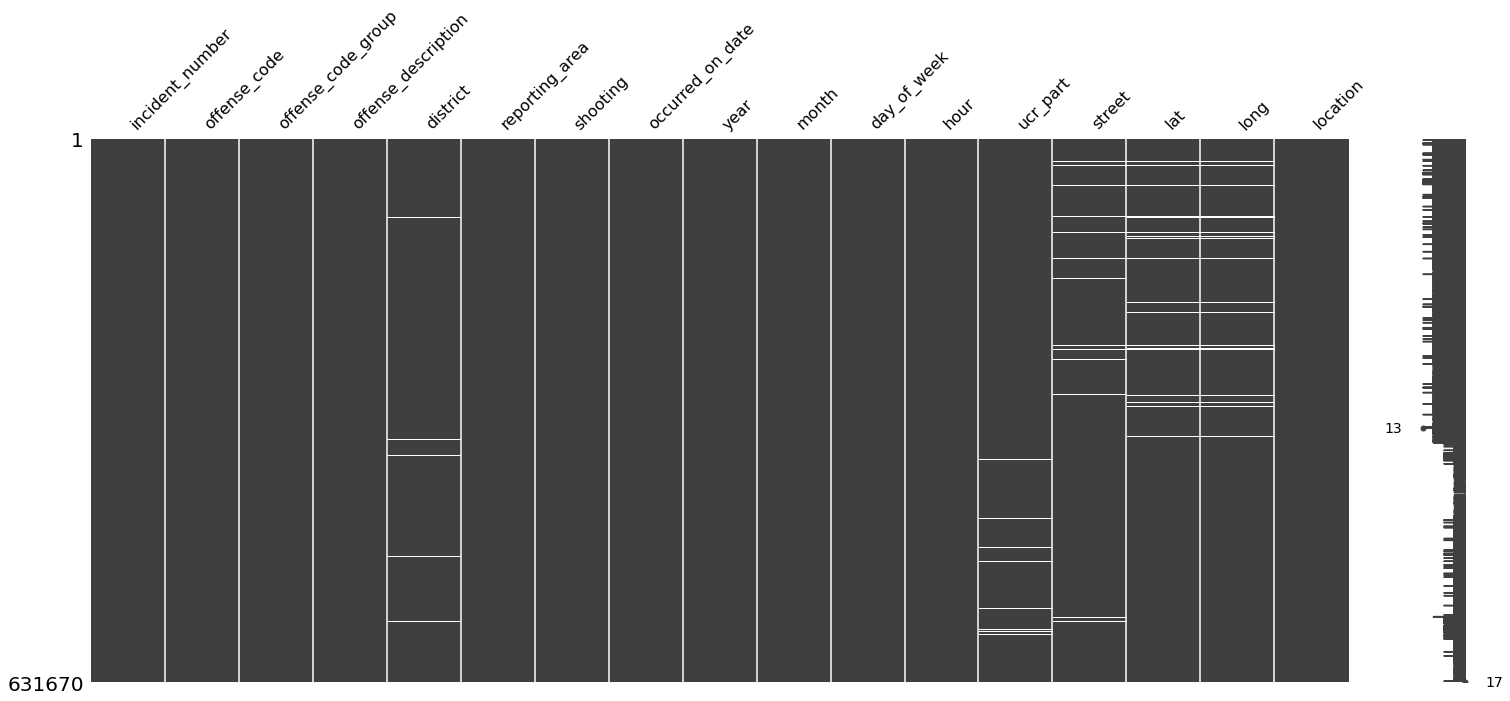

In [421]:
msno.matrix(df)

In [422]:
df.shape

(631670, 17)

In [423]:
NIL = list(df.iloc[np.where(df.ucr_part.isnull())]['offense_code'].unique())

In [424]:
if any(x in p1 for x in NIL):
    print('Found in P1')
elif any(x in p2 for x in NIL):
    print('Found in P2')
elif any(x in p3 for x in NIL):
    print('Found in P3')
elif any(x in p4 for x in NIL):
    print('Found in P4')
else:
    print('Not Found')

Not Found


In [425]:
df.drop(df.iloc[np.where(df.ucr_part.isnull())].index, axis = 0, inplace = True)

<AxesSubplot:>

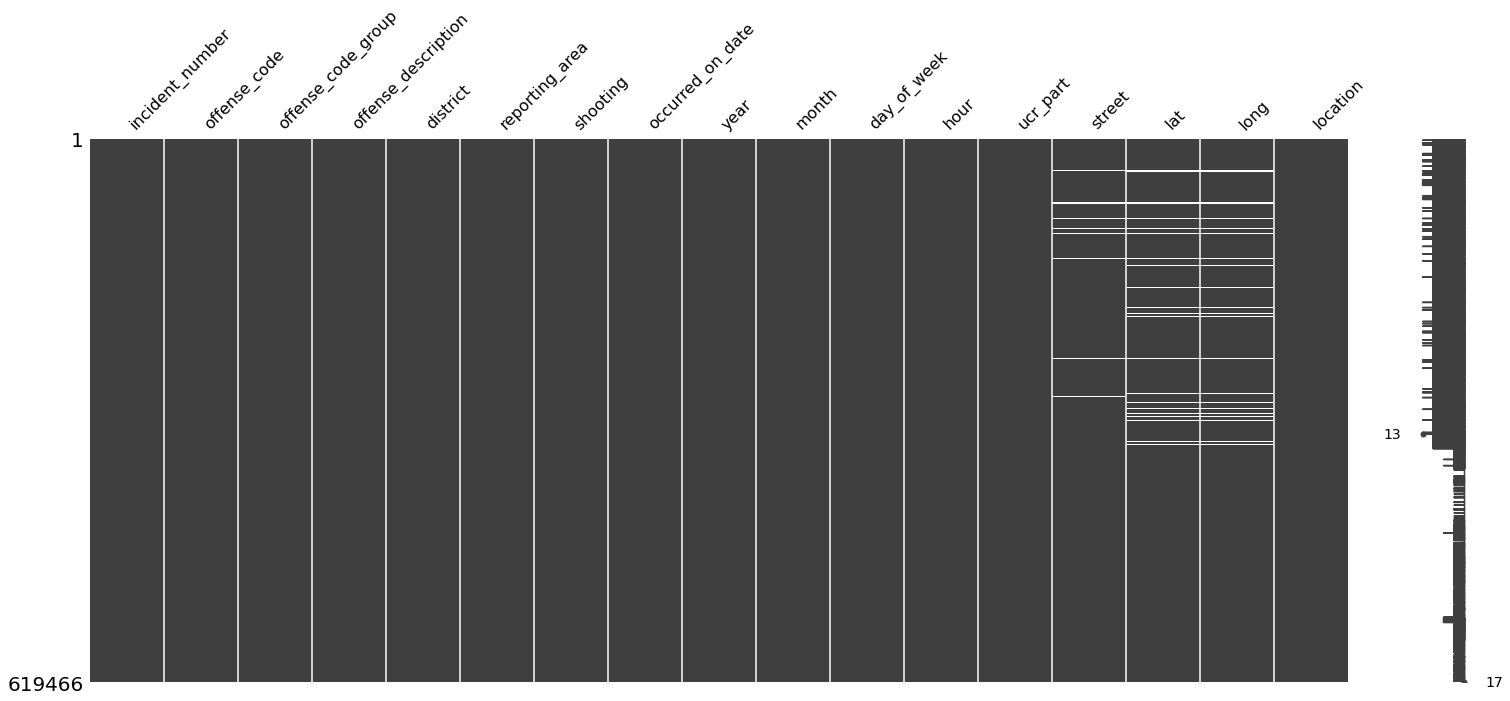

In [426]:
msno.matrix(df)

In [431]:
df.drop(df.iloc[np.where(df.lat.isnull())].index, axis = 0, inplace = True)

<AxesSubplot:>

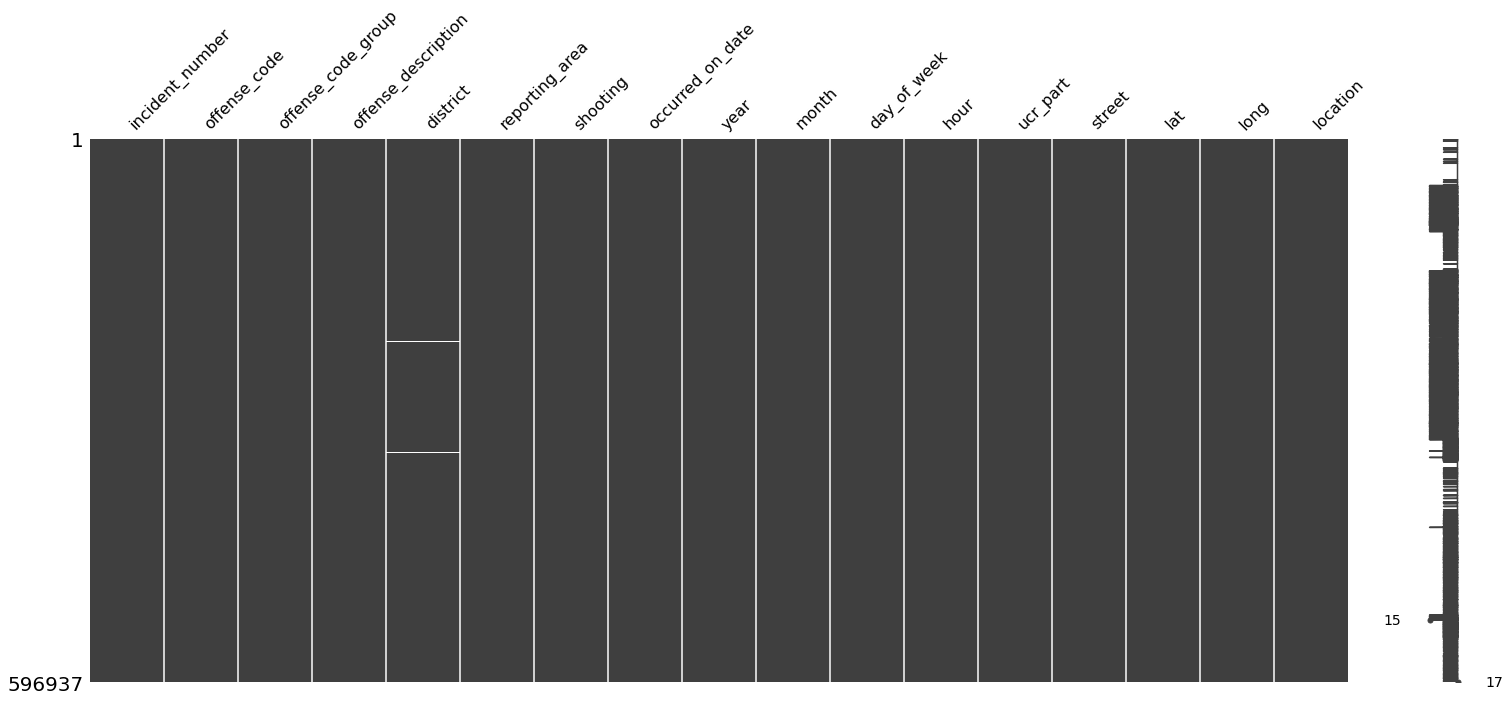

In [432]:
msno.matrix(df)

In [433]:
df.drop(df.iloc[np.where(df.district.isnull())].index, axis = 0, inplace = True)

<AxesSubplot:>

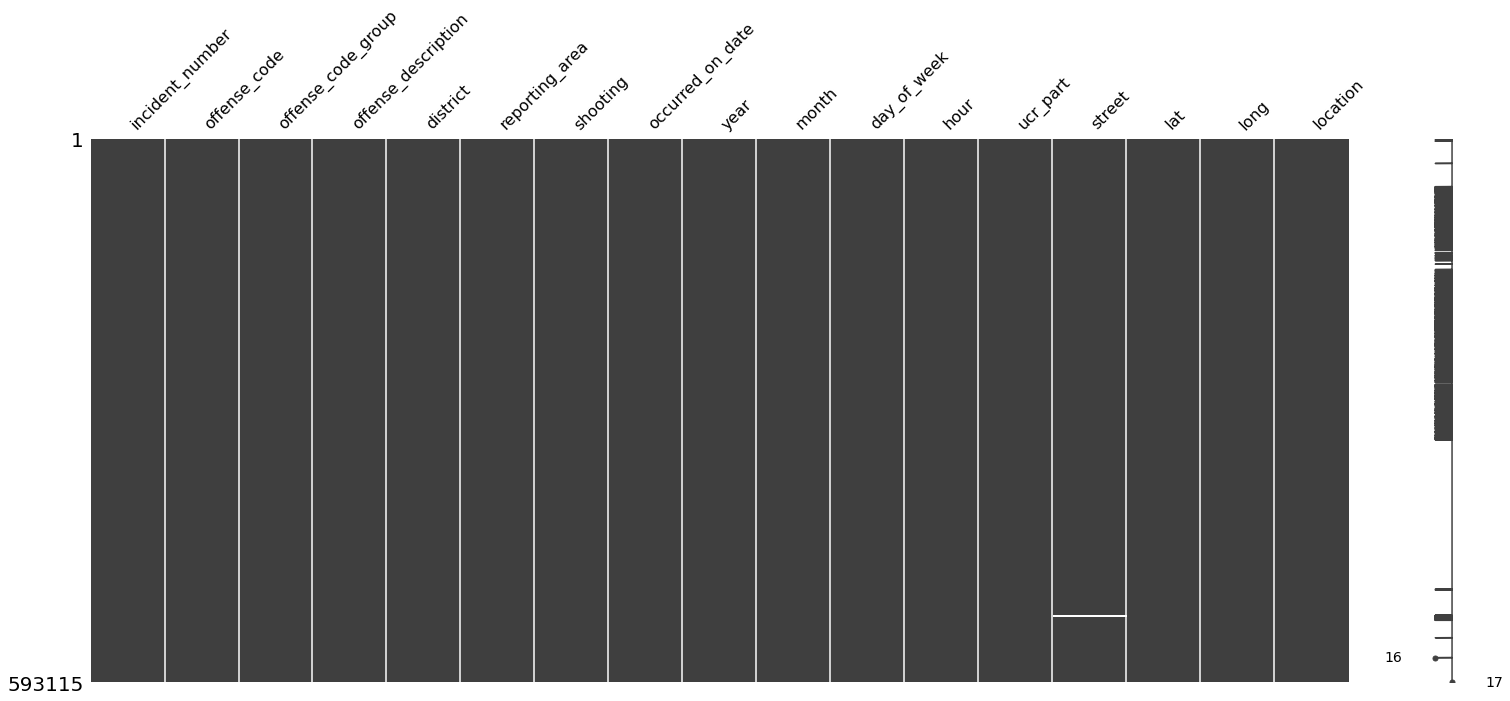

In [434]:
msno.matrix(df)

In [437]:
df.drop(df.iloc[np.where(df.street.isnull())].index, axis = 0, inplace = True)

<AxesSubplot:>

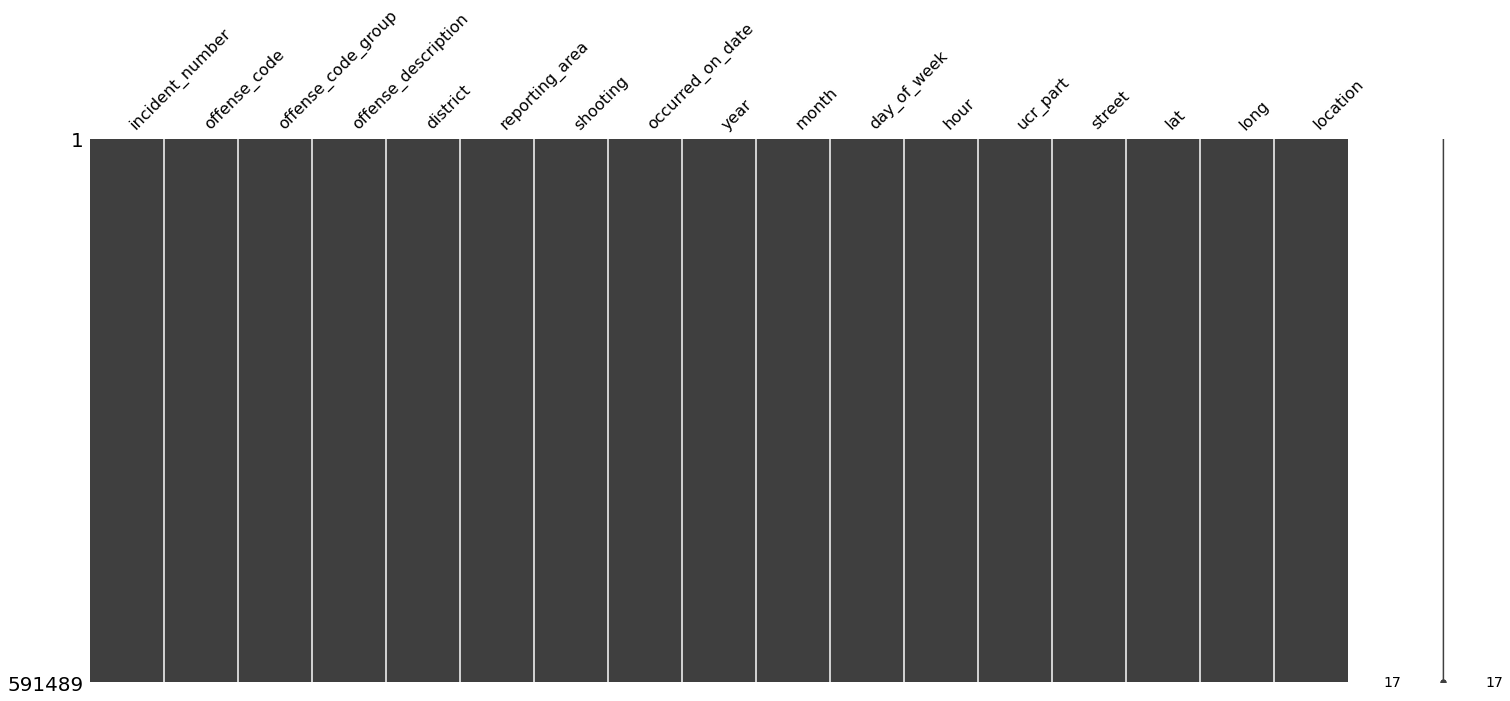

In [438]:
msno.matrix(df)

In [450]:
df.drop('occurred_on_date', axis = 1, inplace = True)

In [451]:
#df.to_csv('cleaned_data.csv', index = False)